**Q1. Problem Statement: DBSCAN Clustering**

Load the "Mall_Customers.csv" dataset into a DataFrame to perform the following tasks:
1.	Find the correlation among the all the columns and drop the column/s with the least correlation
2.	Encode the "Gender" column using get_dummies() function
3.	Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4
4.	Print the size of each cluster and also the size of outliers' cluster
5.	Using a scatter plot shows how annual income corresponds to the spending rates of customers


**Step-1:** Importing the required libraries.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

**Step-2:** Loading the dataset into a DataFrame and performing initial analysis.

In [ ]:
df=pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Step-3:** Finding correlation among the columns.

In [ ]:
corr_mat = df.corr()
corr_mat

<ipython-input-32-07cbaa27f8e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


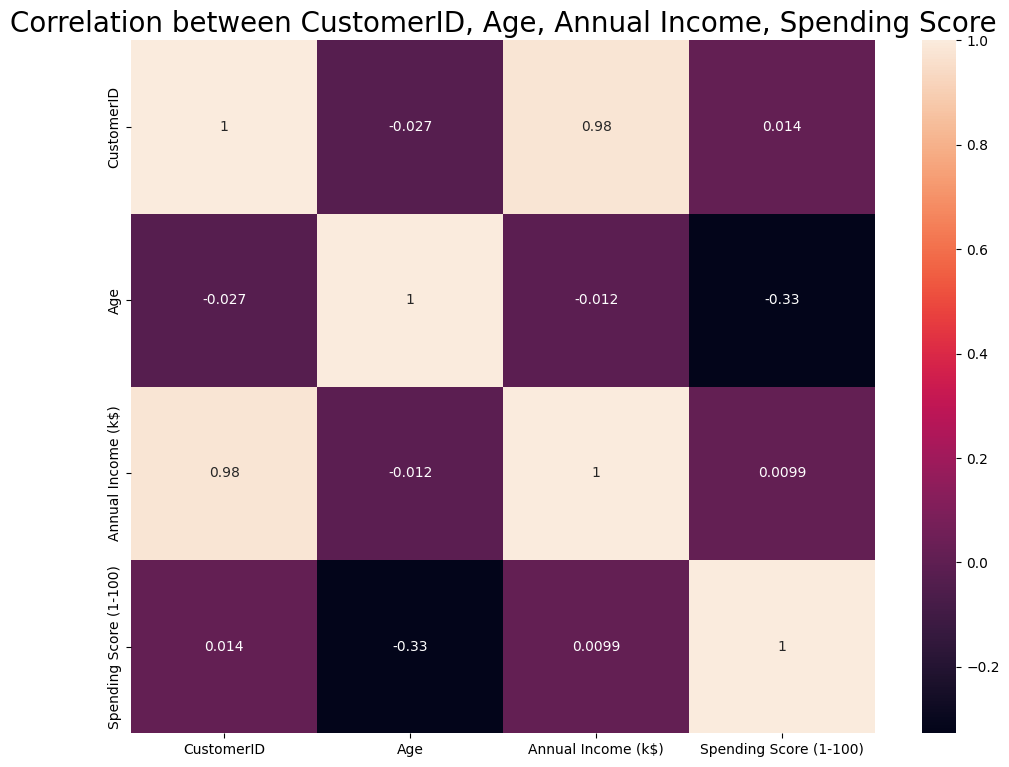

In [ ]:
#plotting correlation matrix
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation between CustomerID, Age, Annual Income, Spending Score', fontsize = 20)
plt.show()

**Step-5:** Dropping "CustomerID" column since it has negligible correlation with other columns and labeling the "Gender" column with 0 and 1.

In [ ]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df= pd.get_dummies(df, columns = ['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


**step-6:** Applying Density Based Spacial Clustering of Applications with noise (DBSCAN) on the data. Here we are creating clusters with eps = 12.5 and min_samples = 4.


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [ ]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(df)

DBSCAN_clustered = df.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append l

**step-7:** Calculate the size of each cluster created and also the number of outliers.

In [ ]:
#Calculating the size of each cluster created
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


**Step-8:**DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers. Now we can find out how annual income effects the spending rate of the potential customers using a scatter plot.


Text(0.5, 1.0, 'How annual income corresponds to the spending rate ')

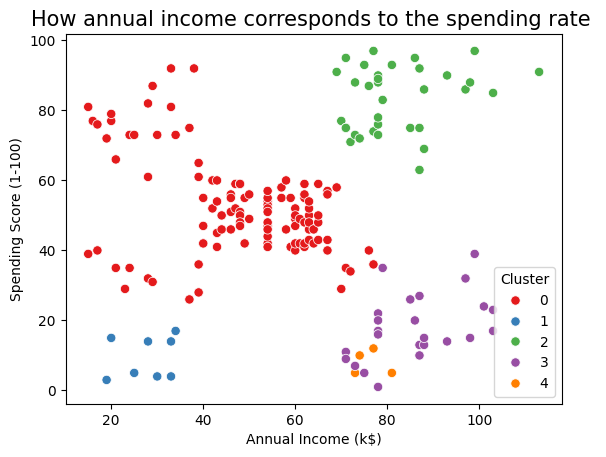

In [ ]:
ax = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                    data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                    hue='Cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize=10)
ax.set_ylabel('Spending Score (1-100)', fontsize=10)
ax.set_title('How annual income corresponds to the spending rate ', fontsize=15)

**Results:** From the sactter plot we can infer that people who earn around 40k$ to 70k$ anually, spend more money in the mall.

**Q2. Problem Statement: Fuzzy C Means Clustering**

**Note:** This problem is in continuation with the previous problem.

With the same DataFrame as in the previous problem, perform tasks:
1.	Convert the DataFrame into a NumPy array using to_numpy()function
2.	Performing the Fuzzy-C-Means clustering with cluster size – 2
3.	Plot the clustered data using a scatter plot to analyze, How the Age of the customers corresponds to the spending rate
4.	Predicting the spending capability of the mall customers using the fcm.predict() function
5.	Using a scatter plot, predicting which of the age group/cluster has will be having highest spending capability



**Step-1:** Downloading/Updaing the fuzz-c-means algorithm.

In [ ]:
!pip install fuzzy-c-means

In [ ]:
!pip install -U scikit-fuzzy

**Step-2:** importing the required libraries.

In [ ]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

**Step-3:** Converting the DataFrame into a NumPy array.

In [ ]:
X= df.to_numpy()

In [ ]:
X

array([[ 19,  15,  39,   0,   1],
       [ 21,  15,  81,   0,   1],
       [ 20,  16,   6,   1,   0],
       [ 23,  16,  77,   1,   0],
       [ 31,  17,  40,   1,   0],
       [ 22,  17,  76,   1,   0],
       [ 35,  18,   6,   1,   0],
       [ 23,  18,  94,   1,   0],
       [ 64,  19,   3,   0,   1],
       [ 30,  19,  72,   1,   0],
       [ 67,  19,  14,   0,   1],
       [ 35,  19,  99,   1,   0],
       [ 58,  20,  15,   1,   0],
       [ 24,  20,  77,   1,   0],
       [ 37,  20,  13,   0,   1],
       [ 22,  20,  79,   0,   1],
       [ 35,  21,  35,   1,   0],
       [ 20,  21,  66,   0,   1],
       [ 52,  23,  29,   0,   1],
       [ 35,  23,  98,   1,   0],
       [ 35,  24,  35,   0,   1],
       [ 25,  24,  73,   0,   1],
       [ 46,  25,   5,   1,   0],
       [ 31,  25,  73,   0,   1],
       [ 54,  28,  14,   1,   0],
       [ 29,  28,  82,   0,   1],
       [ 45,  28,  32,   1,   0],
       [ 35,  28,  61,   0,   1],
       [ 40,  29,  31,   1,   0],
       [ 23,  

**Step-4:** Performing the Fuzzy-C-Means clustering with cluster size-2.

In [ ]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

**Step-5:** Plotting the clsutered data using a scatter plot to analyze, How Age of the customers corresponds to the Spending Rate.

Text(0.5, 1.0, 'Analysing How Age of the Customers Corresponds to the Spending Rate')

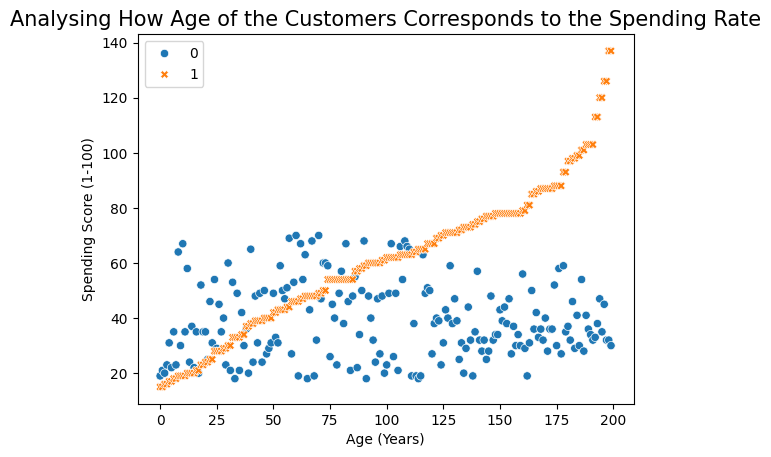

In [ ]:
import numpy as np

# Combine the two columns of the X array into a single array
data = np.c_[X[:,0], X[:,1]]

# Create the scatterplot
ax = sns.scatterplot(data)

# Set the labels and title
ax.set_xlabel('Age (Years)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('Analysing How Age of the Customers Corresponds to the Spending Rate', fontsize = 15)

**Step-6:** Predicting the spending capability of the mall customers using fcm.predict() function.


In [ ]:
#outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

In [ ]:
fcm_centers

array([[32.95923212, 70.38828996, 68.08070168,  0.56259157,  0.43740843],
       [43.92206777, 54.10651822, 38.63954058,  0.57053526,  0.42946474]])

In [ ]:
fcm_labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

**Step-7:** Using a scatter plot, predicting which of the age group/cluster has will be having highest spending capability.

In [ ]:
!pip install scikit-fuzzy



In [ ]:
data = np.c_[X[:,0], X[:,1]]

In [ ]:
data1 = np.c_[X[:,0].ravel(), X[:,1].ravel()]

Text(0.5, 1.0, 'Predicting How Age of the Customers Corresponds to the Spending Rate')

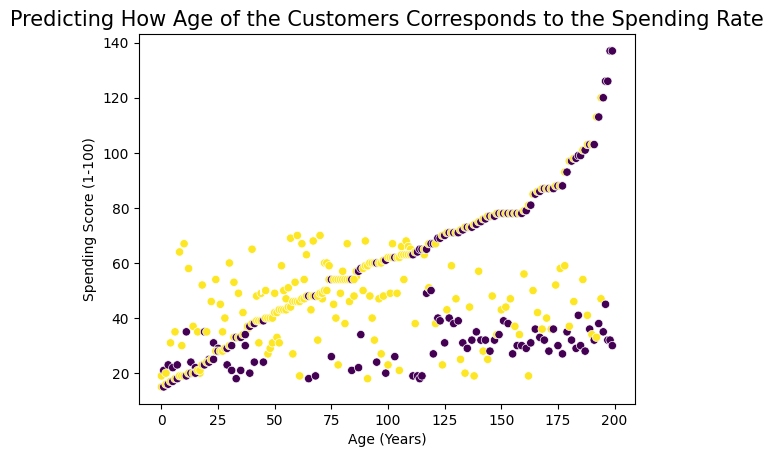

In [ ]:
ax = sns.scatterplot(X[:,0].ravel(), c=fcm_labels)
ax = sns.scatterplot( X[:,1].ravel(), c=fcm_labels, markers="*")
ax.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
ax.set_xlabel('Age (Years)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('Predicting How Age of the Customers Corresponds to the Spending Rate', fontsize = 15)

**Result:** From the scatter plot we can infer that, people of age group 20 years to 40 years spend the more money in the mall. also male customers spend more money compared to thier female counterparts of the same age group.   